# Тема № 1  
Манзар Л.В.

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


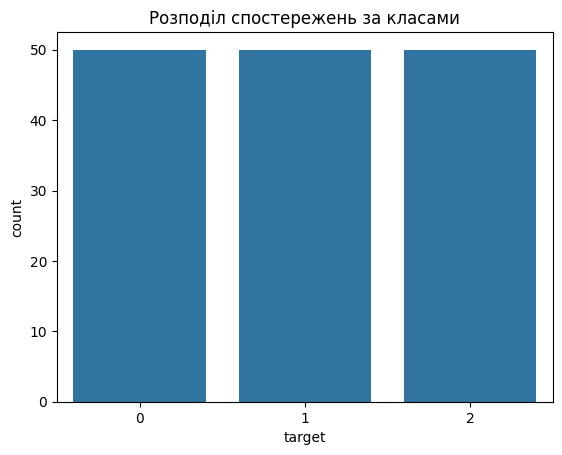

Confusion Matrix:
 [[ 0 49  1]
 [ 3  0 47]
 [32  0 18]]


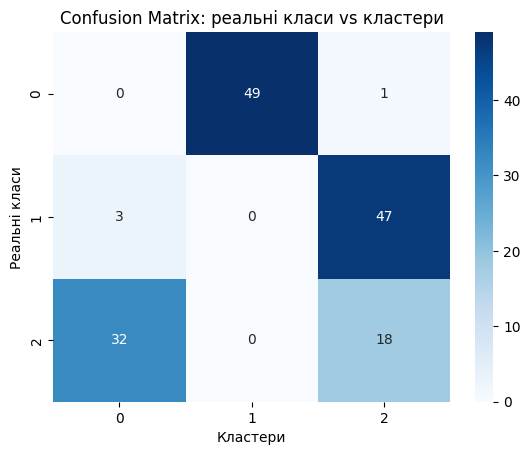

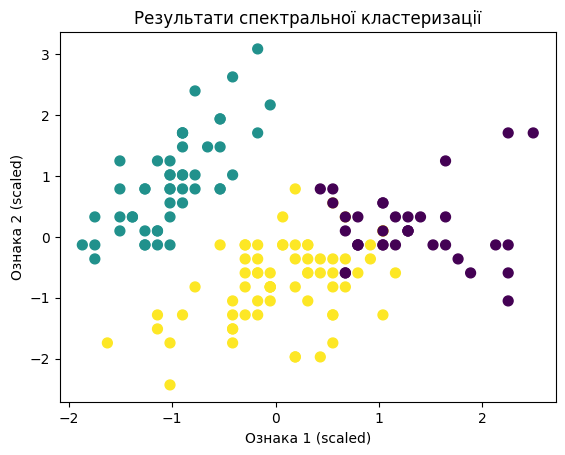

In [1]:
# 1. Імпорт бібліотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import confusion_matrix
import numpy as np

# 2. Завантаження даних та створення DataFrame
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# 3. Базові статистичні характеристики
print(df.describe())

# 4. Візуалізація розподілу за класами
sns.countplot(x='target', data=df)
plt.title("Розподіл спостережень за класами")
plt.show()

# 5. Стандартизація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Спектральна кластеризація
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
clusters = spectral.fit_predict(X_scaled)

# 7. Confusion Matrix
cm = confusion_matrix(y, clusters)
print("Confusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: реальні класи vs кластери")
plt.xlabel("Кластери")
plt.ylabel("Реальні класи")
plt.show()

# 8. Візуалізація кластеризації
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Результати спектральної кластеризації")
plt.xlabel("Ознака 1 (scaled)")
plt.ylabel("Ознака 2 (scaled)")
plt.show()
